#**Advanced Topics Final Project Code**
**By Ashley Brill, Evan Lau, and Simone Rittenhouse**

In this notebook, we will be replicating and expanding the results of the study: [How loneliness is talked about in social media during COVID-19 pandemic: Text mining of 4,492 Twitter feeds](https://www.sciencedirect.com/science/article/pii/S0022395620310748).

We pulled data from Twitter feeds from individuals containing the keywords "loneliness" and "COVID-19" between May 1 and July 1, 2020.

We will use this data to conduct topic modeling and examine which topics were discussed surrounding isolation during the early stages of the pandemic. We will then conduct sentiment-analysis to assess how positive and negative emotions progressed over the course of the months May and June of 2020.

##**Loading in the Data**

In [ ]:
import pandas as pd

corpus = pd.read_csv('covid_loneliness_tweets.csv')

In [ ]:
corpus

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1256357745823027200,1256357745823027200,1.588374e+12,2020-05-01 23:00:03,0,NaN,Written by me .. COVID-19 lesson : Embrace l...,en,"['mediaandmedicine', 'harvardhealth', 'covid__...",[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1256356626258448384,1256356626258448384,1.588374e+12,2020-05-01 22:55:36,0,NaN,Help me make a difference for a cause I care a...,en,"['everythingcounts', 'samaritans', 'mentalheal...",[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1256346683820171264,1256346683820171264,1.588371e+12,2020-05-01 22:16:05,0,NaN,Editorial: Loneliness and Social Isolation in ...,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1256342893897363456,1256342893897363456,1.588370e+12,2020-05-01 22:01:02,0,NaN,How has physical distancing impacted your #men...,en,"['mentalhealth', 'thinkbig', 'yyc', 'mentalhea...",[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1256342636023218180,1256342636023218180,1.588370e+12,2020-05-01 22:00:00,0,NaN,What are you passionate about? All week we're ...,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,1277516333698232327,1277516333698232327,1.593419e+12,2020-06-29 08:16:43,0,NaN,The loneliness associated with this disease is...,en,"['iraq', 'covid_19']",[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1123,1277489858999537665,1277489858999537665,1.593412e+12,2020-06-29 06:31:31,0,NaN,NEW - How the Stress of the COVID-19 Pandemic...,en,"['healthpsych', 'resilience', 'loneliness', 't...",[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1124,1277446457407176706,1277446457407176706,1.593402e+12,2020-06-29 03:39:03,0,NaN,The Impact of Social Isolation and Loneliness ...,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1125,1277436149615779841,1276989439621857280,1.593399e+12,2020-06-29 02:58:06,0,NaN,@TheNomiGirl @TestamentOfDark @ABrit96 @milhis...,en,[],[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'TheNomiGirl', 'name': 'Do Yo...",NaN,NaN,NaN,NaN


In [ ]:
raw_corpus = ""
for text in corpus['tweet']:
  raw_corpus+=text

raw_corpus

'Written by me ..  COVID-19 lesson :  Embrace loneliness, Be the society of Thyself ♥️  #mediaandmedicine  #HarvardHealth  #COVID__19Help me make a difference for a cause I care about. @everydayherouk #everythingcounts  https://t.co/u0YSoeMJDy  Samaritans need our help &amp; support. Please if you can donate 🙏  #Samaritans #mentalhealth #anxiety #isolation #depression #loneliness #COVID__19 #hope #care #NHSEditorial: Loneliness and Social Isolation in Older Adults during the COVID-19 Pandemic: Implications for Gerontological Social Work. - PubMed - NCBI  https://t.co/Cz8wbsqQPyHow has physical distancing impacted your #mentalhealth? Join #ThinkBig experts @jayingram @UCalgary @HotchkissBrain and The Mathison Centre for a virtual discussion of loneliness and community in the age of COVID-19  https://t.co/Iq83bdHDP4 #yyc #MentalHealthWeek  https://t.co/IfjaHryQgbWhat are you passionate about? All week we\'re sharing tips for dealing with loneliness during COVID-19.   💙#6: Find people who

##**Pre-Processing**

Here, we split our tweets corpus into a list of individual words (splitting on whitespace). We also removed empty spaces '' and made all words lowercase.

In [ ]:
import nltk

words = raw_corpus.split(' ')

# getting rid of empty words, non-ASCII characters (emojis and non-English characters), and making everything lowercase
words = [word.lower() for word in words if len(word)>0 and word.isascii()]

Here, we remove all punctuation except for '!', as this may help indicate sentiment.

In [ ]:
import string
punctuation = string.punctuation
punc = [char for char in punctuation if char not in '!']

wordsNoPunc = []

for word in words:
  newWord = ''
  for letter in word:
    if letter not in punc:
      newWord += letter
  
  # making sure word isn't empty and isn't a link
  if len(newWord) > 0 and word[:4] != 'http':
    wordsNoPunc.append(newWord)

print('Total number of words in corpus pre-stopword removal:', len(wordsNoPunc))

Total number of words in corpus pre-stopword removal: 19226


Now, we will be removing stopwords from the corpus.

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')

# removing punctuation from stopword list (to match processed corpus)
mystopwords=[]
for word in stopwords:
  newWord = ''
  for letter in word:
    if letter != "'":
      newWord += letter
  mystopwords.append(newWord)

# removing stopwords and numbers
wordsNoStop = [word for word in wordsNoPunc if word not in mystopwords and not word.isdigit()]

print('\nTotal number of words in corpus:', len(wordsNoStop))

print('\nMOST COMMON WORDS IN CORPUS:')
nltk.FreqDist(wordsNoStop).most_common(20)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.

Total number of words in corpus: 18404

MOST COMMON WORDS IN CORPUS:


[('loneliness', 1112),
 ('covid19', 1023),
 ('isolation', 245),
 ('health', 183),
 ('social', 174),
 ('pandemic', 169),
 ('amp', 151),
 ('people', 144),
 ('mental', 113),
 ('us', 104),
 ('help', 101),
 ('depression', 93),
 ('anxiety', 78),
 ('seniors', 71),
 ('older', 70),
 ('lockdown', 70),
 ('time', 63),
 ('due', 62),
 ('impact', 60),
 ('covid', 59)]

We are now tokenizing the cleaned corpus.

In [ ]:
# tokenizing corpus
cleanText = ' '.join(wordsNoStop)

from nltk.tokenize import word_tokenize
nltk.download('punkt')

tokens = word_tokenize(cleanText)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
print('Total tokens in corpus:', len(tokens))

Total tokens in corpus: 18512


We will now stem using the Porter stemmer, as it is less strict than the Lancaster stemmer. We will also compare our results to a Lemmatizer to see which processed corpus makes the most sense for our analysis.

In [ ]:
# Porter Stemmer
from nltk.stem import PorterStemmer
ps = PorterStemmer()

rootsPorter = []

for token in tokens:
  root = ps.stem(token)
  rootsPorter.append(root)

for x in range(20): # showing first 20
  print([tokens[x], rootsPorter[x]])

['written', 'written']
['covid19', 'covid19']
['lesson', 'lesson']
['embrace', 'embrac']
['loneliness', 'loneli']
['society', 'societi']
['thyself', 'thyself']
['mediaandmedicine', 'mediaandmedicin']
['harvardhealth', 'harvardhealth']
['covid19help', 'covid19help']
['make', 'make']
['difference', 'differ']
['cause', 'caus']
['care', 'care']
['everydayherouk', 'everydayherouk']
['everythingcounts', 'everythingcount']
['samaritans', 'samaritan']
['need', 'need']
['help', 'help']
['amp', 'amp']


In [ ]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()

lemmas = []

for token in tokens:
  lemma = wordnet_lemmatizer.lemmatize(token)
  lemmas.append(lemma)

for x in range(20): # showing first 20
  print("Lemma for {} is {}".format(tokens[x], lemmas[x]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
Lemma for written is written
Lemma for covid19 is covid19
Lemma for lesson is lesson
Lemma for embrace is embrace
Lemma for loneliness is loneliness
Lemma for society is society
Lemma for thyself is thyself
Lemma for mediaandmedicine is mediaandmedicine
Lemma for harvardhealth is harvardhealth
Lemma for covid19help is covid19help
Lemma for make is make
Lemma for difference is difference
Lemma for cause is cause
Lemma for care is care
Lemma for everydayherouk is everydayherouk
Lemma for everythingcounts is everythingcounts
Lemma for samaritans is samaritan
Lemma for need is need
Lemma for help is help
Lemma for amp is amp


After considering both outputs, we will proceed with lemmatization. The lemmatizer helped simplify unnecessary pluralizations (e.g. 'samaritans' became 'samaritan') while still keeping the meaning of the words. However, the Porter stemmmer made some words nonsensical, like 'embrac' and 'loneli' - which makes it less ideal than lemmatization.

We will now define a function with the steps taken that can be applied to individual tweets from the CSV file.

In [ ]:
def preprocess(tweet, punctuation=string.punctuation, stopwords=mystopwords):
  words = tweet.split(' ')

  # capitalization and removing emojis & non-english characters
  words = [word.lower() for word in words if len(word)>0 and word.isascii()]

  # removing punctuation (except for '!')
  punc = [char for char in punctuation if char not in '!']

  wordsNoPunc = []
  for word in words:
    newWord = ''
    for letter in word:
      if letter not in punc:
        newWord += letter
    # making sure word isn't empty and isn't a link
    if len(newWord) > 0 and word[:4] != 'http':
      wordsNoPunc.append(newWord)

  # removing stopwords
  wordsNoStop = [word for word in wordsNoPunc if word not in stopwords and not word.isdigit()]

  # tokenizing
  cleanText = ' '.join(wordsNoStop)
  tokens = word_tokenize(cleanText)

  # Lemmatization
  wordnet_lemmatizer = WordNetLemmatizer()
  lemmas = []
  for token in tokens:
    lemma = wordnet_lemmatizer.lemmatize(token)
    lemmas.append(lemma)

  return lemmas

Applying the function to the corpus to have a dictionary of lists, where each list represents tokens of a processed tweet. Each entry's key is the date the tweet was posted.

In [ ]:
corpusFull = []

for tweet in range(len(corpus['tweet'])):
  corpusFull.append(preprocess(corpus['tweet'].iloc[tweet]))

# showing processed corpus:
corpus_df = pd.DataFrame({'tweet':corpusFull})
corpus_df

,tweet
0,"[written, covid19, lesson, embrace, loneliness..."
1,"[help, make, difference, cause, care, everyday..."
2,"[editorial, loneliness, social, isolation, old..."
3,"[physical, distancing, impacted, mentalhealth,..."
4,"[passionate, week, sharing, tip, dealing, lone..."
...,...
1122,"[loneliness, associated, disease, overwhelming..."
1123,"[new, stress, covid19, pandemic, scramble, bra..."
1124,"[impact, social, isolation, loneliness, mental..."
1125,"[thenomigirl, testamentofdark, abrit96, milhis..."


In [ ]:
tokensFull = 0
for tweet in corpusFull:
  for tokens in tweet:
    tokensFull += 1

print('Total tokens in corpus after pre-processing:', tokensFull)

Total tokens in corpus after pre-processing: 19226


##**Exploratory Analysis**

We will now transform the corpus using TF-IDF to take into account the relative importance of each word throughout the corpus.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpusJoin = []
for tweet in corpusFull:
  corpusJoin.append(' '.join(tweet))

tfidf = TfidfVectorizer(stop_words = 'english', min_df=0.01, ngram_range=(1,2))
corpus_tf = tfidf.fit_transform(corpusJoin)
feats = tfidf.get_feature_names()

corpus_array = corpus_tf.toarray()

tf_idf = pd.DataFrame(corpus_array, columns = feats, index = corpus['id'])
tf_idf

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,able,able concentrate,abuse,address,adult,age,ageing,america,america loneliness,american,...,week,wellbeing,work,work depression,working,world,worry,worse,year,young
id,,,,,,,,,,,,,,,,,,,,,
1256357745823027200,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1256356626258448384,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1256346683820171264,0.0,0.0,0.0,0.0,0.319129,0.00000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.323518,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1256342893897363456,0.0,0.0,0.0,0.0,0.000000,0.33272,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1256342636023218180,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,...,0.252112,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277516333698232327,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1277489858999537665,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1277446457407176706,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# getting important keywords

keywords = tf_idf.sum(axis=0).sort_values(ascending=False)[0:30]
keywords

loneliness              115.558418
covid19                 115.380334
loneliness covid19       52.288266
isolation                51.954348
pandemic                 44.220512
health                   41.424743
social                   41.055718
amp                      37.323936
people                   37.274679
covid19 pandemic         33.445197
help                     30.144197
covid19 loneliness       28.690087
mental                   28.159349
senior                   27.025428
lockdown                 24.378877
social isolation         24.363578
mental health            24.151095
time                     23.832519
feeling                  23.666543
impact                   22.865010
anxiety                  22.834758
depression               22.670206
covid                    22.203452
isolation loneliness     21.576600
today                    20.120059
older                    19.736606
support                  18.925602
week                     18.471136
loneliness isolation

We will use these keywords to conduct exploratory analysis on the corpus. We are particularly interested in KWIC to understand the topics being discussed around important keywords - which may help us understand the results of topic modeling. We will also show a lexical dispersion plot to see which keywords appear more or less frequently over time. This will help us in our sentiment analysis to determine if sentiment changed over time.

In [ ]:
# KWIC (using unprocessed corpus to see full context)
from nltk.text import Text

tokenizer = nltk.tokenize.WhitespaceTokenizer()
t = Text(tokenizer.tokenize(raw_corpus))
print(t.concordance('covid-19'), '\n')
print(t.concordance('loneliness'), '\n');
print(t.concordance('isolation'), '\n');
print(t.concordance('pandemic'), '\n');
print(t.concordance('anxiety'), '\n');
print(t.concordance('depression'), '\n');
print(t.concordance('health'), '\n');

Displaying 25 of 647 matches:
                                   COVID-19 lesson : Embrace loneliness, Be th
olation in Older Adults during the COVID-19 Pandemic: Implications for Geronto
liness and community in the age of COVID-19 https://t.co/Iq83bdHDP4 #yyc #Ment
liness when I say it, but where is Covid-19 already?@VersusArthritis I'm only 
ut just couldn't carry on) and now Covid-19 is adding to pressure &amp; loneli
ut just couldn't carry on) and now Covid-19 is adding to pressure &amp; loneli
f Social Isolation: Loneliness and COVID-19 - Psychiatry Advisor https://t.co/
f Social Isolation: Loneliness and COVID-19 https://t.co/IUBidcQCcBDr. Vivek M
rthy on fighting loneliness during COVID-19 pandemic ➡️ https://t.co/k3X6ntUn8
h is probably 50% or so during the COVID-19 pandemic. Hear from Dr. @billhowat
ना वायरस https://t.co/RF3nRuK2qxIn COVID-19 pandemic, we isolate with loved on
choosing our paper! Written before Covid-19 but including strategies older peo
out foreign/Mideast af

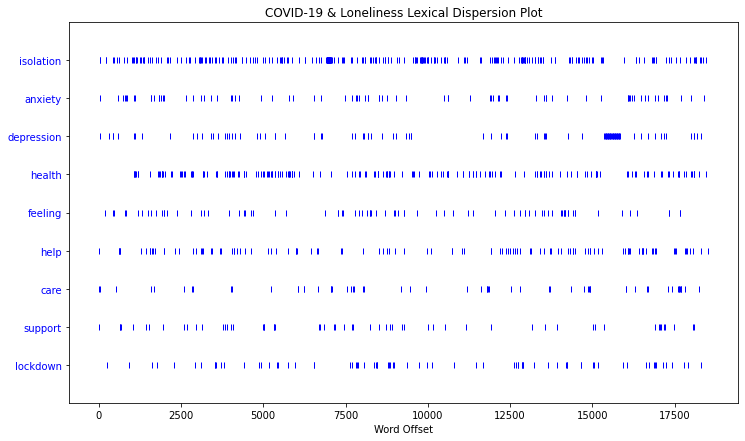

In [ ]:
# lexical dispersion plot
from nltk.draw.dispersion import dispersion_plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,7))
targets = ['isolation', 'anxiety', 'depression', 'health', 'feeling', 'help', 'care', 'support', 'lockdown']

dispersion_plot(lemmas, targets, ignore_case = True, title='COVID-19 & Loneliness Lexical Dispersion Plot')

In [ ]:
# seeing where to place dates on plot (xticks)
datePos = []

corpus_df['date'] = corpus['date'].str[5:10]
corpus_df['tweet_len'] = [len(tweet) for tweet in corpus_df['tweet']]

cutoffs = corpus_df.groupby('date').sum()
dates = list(cutoffs.index)

prevWords = 0
for date in range(len(dates)):
  datePos.append(prevWords)
  #datePos.append((cutoffs['tweet_len'].iloc[date]/2) + prevWords)
  prevWords += cutoffs['tweet_len'].iloc[date]

print(dates)
print(datePos)

['05-01', '05-02', '05-05', '05-07', '05-08', '05-14', '05-16', '05-17', '05-19', '05-22', '05-24', '05-27', '05-28', '06-03', '06-04', '06-06', '06-10', '06-11', '06-12', '06-13', '06-15', '06-17', '06-18', '06-19', '06-20', '06-21', '06-22', '06-23', '06-25', '06-26', '06-27', '06-29']
[0, 357, 1010, 1803, 2173, 2817, 3037, 3541, 3905, 4859, 5712, 6254, 7426, 8100, 8445, 8835, 8967, 9840, 10526, 11657, 12322, 13401, 14716, 15019, 15804, 16764, 17027, 17307, 17631, 17958, 18283, 18664]


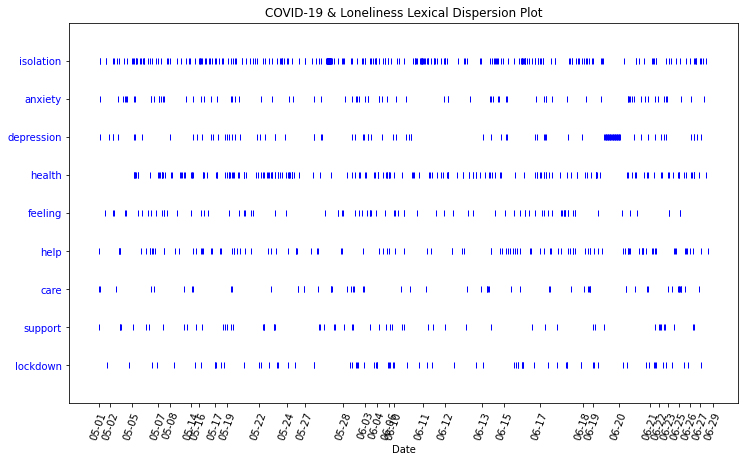

In [ ]:
# modifying NLTK dispersion plot so x-axis shows date
def dispersion_plot(text, words, ignore_case=False, title="Lexical Dispersion Plot"):
    """
    Generate a lexical dispersion plot.

    :param text: The source text
    :type text: list(str) or enum(str)
    :param words: The target words
    :type words: list of str
    :param ignore_case: flag to set if case should be ignored when searching text
    :type ignore_case: bool
    """

    try:
        from matplotlib import pylab
    except ImportError as e:
        raise ValueError(
            "The plot function requires matplotlib to be installed."
            "See https://matplotlib.org/"
        ) from e

    text = list(text)
    words.reverse()

    if ignore_case:
        words_to_comp = list(map(str.lower, words))
        text_to_comp = list(map(str.lower, text))
    else:
        words_to_comp = words
        text_to_comp = text

    points = [
        (x, y)
        for x in range(len(text_to_comp))
        for y in range(len(words_to_comp))
        if text_to_comp[x] == words_to_comp[y]
    ]
    if points:
        x, y = list(zip(*points))
    else:
        x = y = ()
    pylab.plot(x, y, "b|", scalex=0.1)
    pylab.yticks(list(range(len(words))), words, color="b")
    pylab.ylim(-1, len(words))
    pylab.title(title)
    pylab.xticks(ticks = datePos, labels = dates, rotation = 70)
    pylab.xlabel("Date")
    pylab.show()

fig, ax = plt.subplots(figsize=(12,7))
targets = ['isolation', 'anxiety', 'depression', 'health', 'feeling', 'help', 'care', 'support', 'lockdown']

dispersion_plot(lemmas, targets, ignore_case = True, title='COVID-19 & Loneliness Lexical Dispersion Plot')

#**Topic Modeling**

Now, in order to see which topics were discussed surrounding loneliness and COVID-19 during this timeframe, we will perform topic modeling.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud

def plot_top_words(model, feature_names, num_topics, n_top_words):
  x = num_topics // 5 + 1 if (num_topics % 5 !=0) else num_topics//5
  y = num_topics if (num_topics < 5) else 5

  fig, axes = plt.subplots(x, y, figsize=(18,8), sharex=True)
  axes = axes.flatten()
  for topic_idx, topic in enumerate(model.components_):
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
    top_features = [feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights)
    ax.set_title(f'Topic {topic_idx +1}')
    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major')
    for i in 'top right left'.split():
      ax.spines[i].set_visible(False)
    fig.suptitle('Topics in LDA model', fontsize=16)

  plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
  plt.show()

def plot_wordclouds(model, feature_names, num_topics, n_top_words):
  x = num_topics // 3 + 1 if (num_topics % 3 !=0) else num_topics//3
  y = num_topics if (num_topics < 3) else 3

  fig, axes = plt.subplots(x, y, figsize=(18,4), sharex=True)
  axes = axes.flatten()
  for topic_idx, topic in enumerate(model.components_):
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
    top_features = [feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    freq, index = {}, 0
    for word in top_features:
      freq[word] = weights[index]
      index += 1

    ax = axes[topic_idx]
    ax.imshow(WordCloud(normalize_plurals=False, background_color='white').generate_from_frequencies(freq))
    ax.axis("off")
    ax.set_title("Topic {}".format(topic_idx + 1), fontsize = 18)

    fig.suptitle('Word Clouds for Topics in LDA model', fontsize=20)

  plt.show()

In [ ]:
# LDA algorithm with given number of components
lda = LatentDirichletAllocation(n_components=3, max_iter=20,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

# Using tf-idf transformed data
lda.fit(corpus_tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=20, n_components=3, random_state=0)

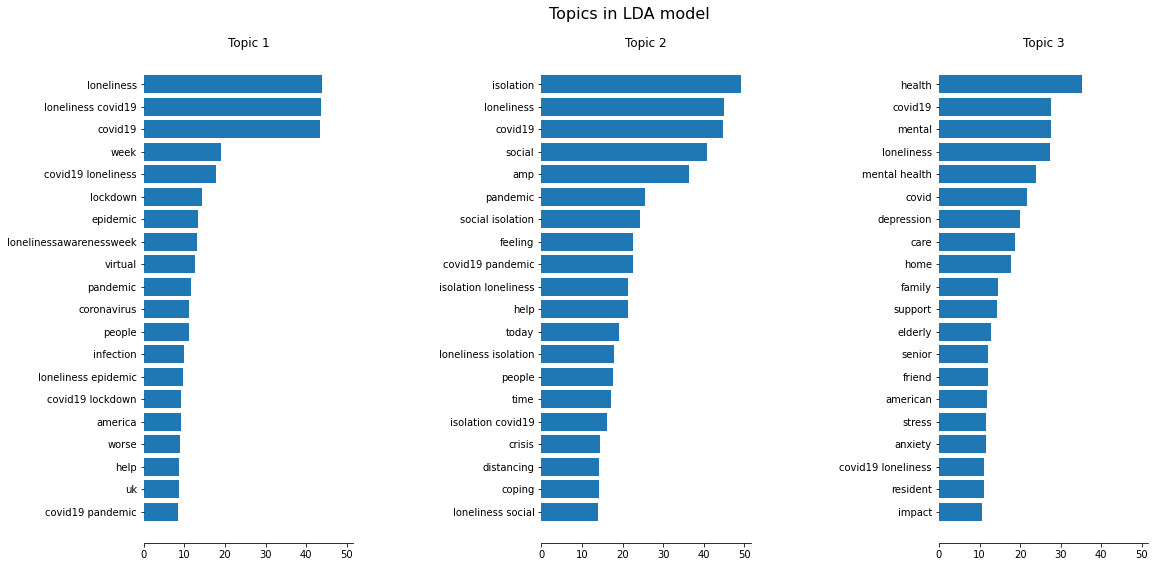

In [ ]:
# plotting words and their weight
plot_top_words(lda, feats, 3, 20)

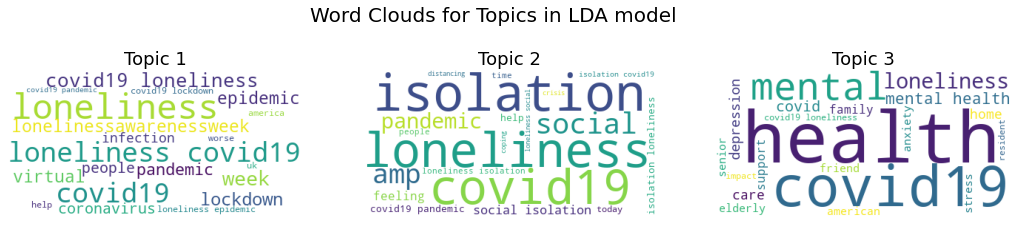

In [ ]:
# plotting wordclouds
plot_wordclouds(lda, feats, 3, 20)

# **Topics Over Time**

To see if topics change over time, we will plot counts of words from top features over time.

In [ ]:
# function to find count of word in each day
def get_counts(words):
  counts = []
  date = [date[5:10] for date in corpus['date']]
  uniqueDates = list(pd.Series(date).drop_duplicates())
  
  index = 0
  whichDay = 0
  while whichDay < len(uniqueDates):
    count = 0
    while index < len(date) and date[index] == uniqueDates[whichDay]:
      count += len([w for w in corpusFull[index] if w in words])
      index += 1
    whichDay += 1
    counts.append(count)

  return counts

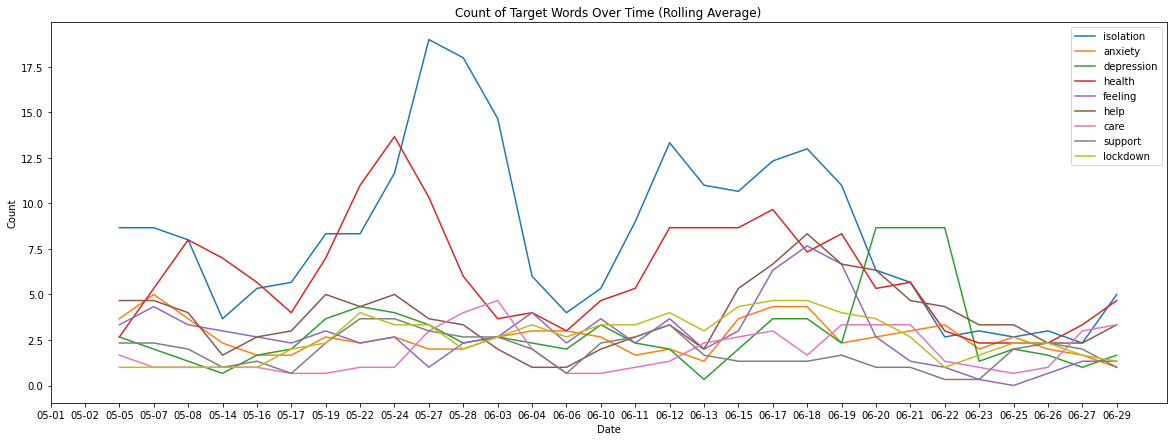

In [ ]:
targets = ['isolation', 'anxiety', 'depression', 'health', 'feeling', 'help', 'care', 'support', 'lockdown']

plt.figure(figsize=(20,7))
for target in targets:
  counts = get_counts([target])
  counts = pd.DataFrame(counts).rolling(3).mean()

  plt.plot(counts, label = target)
plt.legend(loc='best')
plt.title('Count of Target Words Over Time (Rolling Average)')
plt.xlabel('Date')
plt.xticks(ticks=range(len(counts)), labels=list(pd.Series([date[5:10] for date in corpus['date']]).drop_duplicates()))
plt.ylabel('Count')
plt.show()

We will now repeat this process, however we will find the counts of words that appear in the topics we modeled.

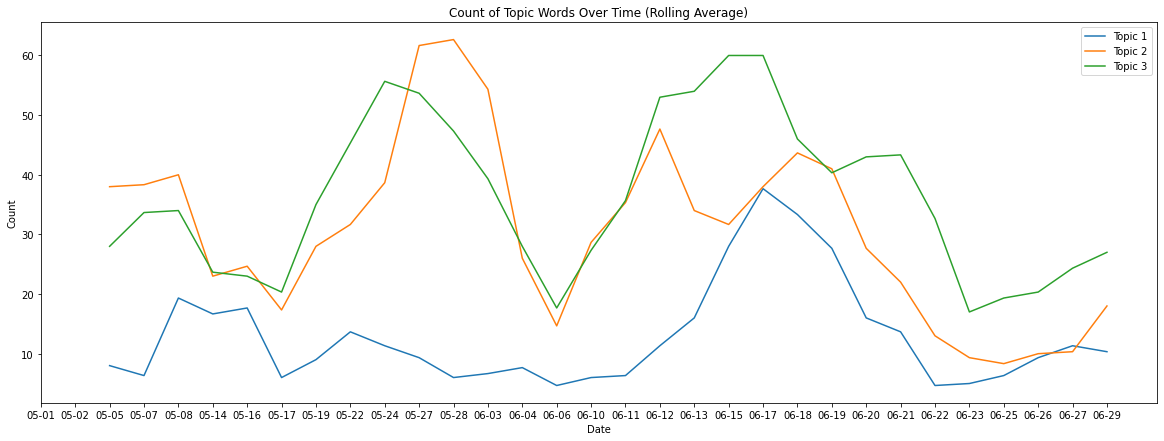

In [ ]:
topicKeyTerms = []
for topic_idx, topic in enumerate(lda.components_):
    top_features_ind = topic.argsort()[:-20 - 1:-1]
    top_features = [feats[i] for i in top_features_ind]
    topicKeyTerms.append(top_features)

# getting rid of words that appear in multiple topics (only keeping words specific to a topic)
uniqueTopicWords = []
for x in range(len(topicKeyTerms)):
  uniqueTopic = []
  for word in topicKeyTerms[x]:
    if x != len(topicKeyTerms)-1 and word not in topicKeyTerms[x+1] and word not in topicKeyTerms[x-1]:
      uniqueTopic.append(word)
    if x == len(topicKeyTerms)-1 and word not in topicKeyTerms[x-1] and word not in topicKeyTerms[x-2]:
      uniqueTopic.append(word)
  uniqueTopicWords.append(uniqueTopic)

# getting topic counts
plt.figure(figsize=(20,7))
topicCounts = []
for topic in uniqueTopicWords:
  counts = get_counts(topic)
  topicCounts.append(counts)
  counts = pd.DataFrame(counts).rolling(3).mean()

  plt.plot(counts, label = 'Topic {}'.format(uniqueTopicWords.index(topic)+1))
  
plt.legend(loc='best')
plt.title('Count of Topic Words Over Time (Rolling Average)')
plt.xlabel('Date')
plt.xticks(ticks=range(len(counts)), labels=list(pd.Series([date[5:10] for date in corpus['date']]).drop_duplicates()))
plt.ylabel('Count')
plt.show()

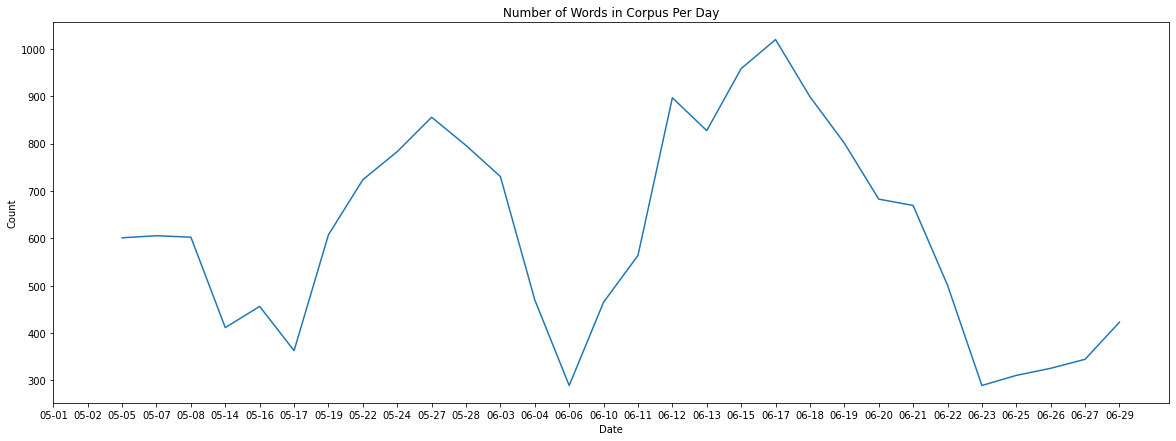

In [ ]:
# checking count of words across days (to see if topics trend correlates with the overall number of words per day)
words = []
for tweet in corpusFull:
  for word in tweet:
    words.append(word)

fullCounts = get_counts(words)
topicCounts.append(fullCounts)
fullCounts_df = pd.DataFrame(fullCounts).rolling(3).mean()

plt.figure(figsize=(20,7))
plt.plot(fullCounts_df)
plt.title('Number of Words in Corpus Per Day')
plt.xlabel('Date')
plt.xticks(ticks=range(len(fullCounts_df)), labels=list(pd.Series([date[5:10] for date in corpus['date']]).drop_duplicates()))
plt.ylabel('Count')
plt.show()

To show the relationship between these topics over time, we're finding the correlation matrix between their counts:

In [ ]:
pd.DataFrame(topicCounts, index=['Topic 1', 'Topic 2', 'Topic 3', 'Full Word Count']).T.corr()

,Topic 1,Topic 2,Topic 3,Full Word Count
Topic 1,1.00000,0.251600,0.453200,0.556890
Topic 2,0.25160,1.000000,0.605841,0.765244
Topic 3,0.45320,0.605841,1.000000,0.902834
Full Word Count,0.55689,0.765244,0.902834,1.000000


#**Sentiment-Analysis**

In [ ]:
import seaborn as sns

# defining functions that will be used across dictionaries

# creating sentiment_df (Pandas DataFrame)
def sent_df(sentimentList):
  sent_df = pd.DataFrame(sentimentList, columns = ['sentiment'])
  sent_df['date'] = corpus['date'].str[5:10]
  sent_df['id'] = corpus['id']
  return sent_df

# boxplot of sentiment over time
def sent_boxplot(sent_df, dictionary):
  plt.figure(figsize = (20, 7))
  sns.boxplot(x="date", y="sentiment", data=sent_df)
  plt.title('Sentiment Scores Across Dates ({})'.format(dictionary))
  plt.xlabel('Date')
  plt.ylabel('Sentiment Score')

# line graph of positive/negative sentiment over time
def sent_linegraph(sent_df, dictionary):
  # NEED TO DIVIDE BY LENGTH OF TWEETS PER DAY (otherwise days with more tweets will probably have higher total sentiment since each tweet has a score)
  positive_sent = sent_df[sent_df['sentiment'] > 0].groupby('date')['sentiment'].apply(lambda c: c.sum()/c.count())
  negative_sent = sent_df[sent_df['sentiment'] < 0].groupby('date')['sentiment'].apply(lambda c: c.abs().sum()/c.count())
  intensity = sent_df.groupby('date')['sentiment'].apply(lambda c: c.abs().sum()/c.count())

  # making sure that indexes are aligned and handling missing values
  sent=pd.concat([positive_sent.to_frame(), negative_sent.to_frame(), intensity.to_frame()], axis=1, join='outer').reindex(sent_df['date'].drop_duplicates())
  sent.columns = ['pos_sent', 'neg_sent', 'intensity']
  sent.fillna(0, inplace = True)

  sent['rolling_positive'] = sent['pos_sent'].rolling(2).mean()
  sent['rolling_negative'] = sent['neg_sent'].rolling(2).mean()

  plt.figure(figsize=(20, 5))
  #plt.plot(sent['intensity'], label='overall intensity')
  #plt.plot(sent['pos_sent'], label='positive sentiment')
  #plt.plot(sent['neg_sent'], label='negative sentiment')
  plt.plot(sent['rolling_positive'], label='positive sentiment (rolling average)')
  plt.plot(sent['rolling_negative'], label='negative sentiment (rolling average)')
  plt.legend(loc='best')
  plt.title('Intensity of Positive and Negative Sentiment Over Time ({})'.format(dictionary))
  plt.xlabel('Date')
  plt.ylabel('Normalized Intensity')
  plt.show()

To analyze sentiment, we will first used a dictionary-based method with Afinn - finding the sentiment of each individual tweet and then averaging across the dates to show how sentiment may have changed over time.

In [ ]:
!pip install Afinn --quiet

     |████████████████████████████████| 52 kB 861 kB/s 


In [ ]:
from afinn import Afinn
af = Afinn()

sentiment_scores = []

for tweet in corpusFull:
  sentiment_scores.append(af.score(' '.join(tweet)))

print(sentiment_scores)

[1.0, 13.0, 0.0, 1.0, 8.0, 2.0, 5.0, -1.0, -5.0, -4.0, -1.0, 0.0, 0.0, -2.0, -2.0, -3.0, 10.0, 4.0, 0.0, -12.0, 0.0, 2.0, -2.0, -5.0, 0.0, -3.0, 2.0, -2.0, 0.0, 5.0, 1.0, 3.0, -1.0, -6.0, 5.0, 6.0, -4.0, -2.0, 5.0, -6.0, 3.0, 1.0, 4.0, -4.0, 0.0, -1.0, -1.0, -3.0, -3.0, -5.0, 0.0, -7.0, 4.0, -3.0, 2.0, 4.0, 3.0, 3.0, 4.0, 9.0, -1.0, 0.0, -12.0, 0.0, -9.0, 3.0, 2.0, 1.0, 4.0, 0.0, -3.0, 0.0, -1.0, -1.0, 0.0, 2.0, -12.0, 2.0, 2.0, 0.0, 1.0, 4.0, -1.0, 3.0, 5.0, 3.0, -6.0, -4.0, 0.0, 4.0, 1.0, 3.0, -9.0, 0.0, -1.0, -1.0, 7.0, -6.0, 2.0, -3.0, 0.0, 0.0, 3.0, -1.0, -7.0, 2.0, -1.0, 6.0, 0.0, 10.0, -1.0, -10.0, -3.0, 4.0, 0.0, -3.0, -6.0, -6.0, 1.0, 1.0, -3.0, -1.0, 5.0, -1.0, 2.0, -4.0, 0.0, 0.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, 1.0, -2.0, 0.0, -3.0, 1.0, -3.0, -2.0, 0.0, -9.0, 0.0, -5.0, -6.0, 0.0, -3.0, 1.0, -1.0, 1.0, 1.0, -4.0, 4.0, 5.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 3.0, 0.0, -2.0, 0.0, 0.0, 0.0, 0.0, -6.0, 3.0, 0.0, -7.0, 1.0, 0.0, 0.0, -1.0, -7.0, 0.0, 0.0, 4.0, 0.0, 1.

In [ ]:
afinn_df = sent_df(sentiment_scores)

most_pos = afinn_df[afinn_df['sentiment'] == max(afinn_df['sentiment'])]['id']
most_neg = afinn_df[afinn_df['sentiment'] == min(afinn_df['sentiment'])]['id']

most_pos = int(most_pos.index[0])
most_neg = int(most_neg.index[0])

# printing most extreme tweets (positive and negative) as found by Afinn
print("MOST POSITIVE TWEET (Afinn):")
print(corpus['tweet'].iloc[most_pos])

print("\nMOST NEGATIVE TWEET (Afinn):")
print(corpus['tweet'].iloc[most_neg])

MOST POSITIVE TWEET (Afinn):
Help me make a difference for a cause I care about. @everydayherouk #everythingcounts  https://t.co/u0YSoeMJDy  Samaritans need our help &amp; support. Please if you can donate 🙏  #Samaritans #mentalhealth #anxiety #isolation #depression #loneliness #COVID__19 #hope #care #NHS

MOST NEGATIVE TWEET (Afinn):
This COVID-19 shit sucks. The symptoms are bad but worst of all the depression and loneliness it hits you with is way worse...


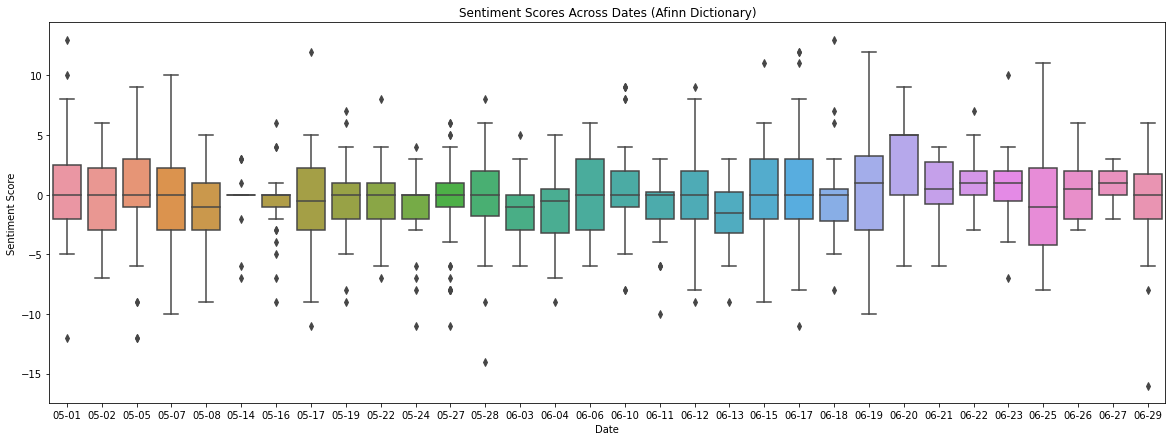

In [ ]:
sent_boxplot(afinn_df, 'Afinn Dictionary')

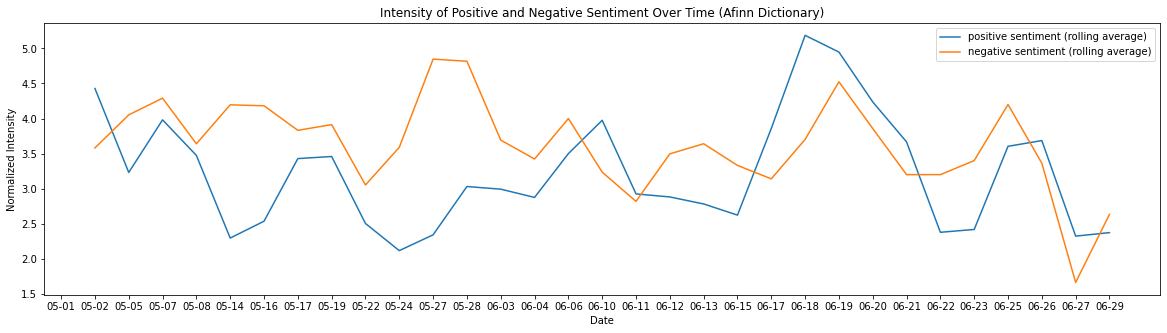

In [ ]:
sent_linegraph(afinn_df, 'Afinn Dictionary')

We will now try the same technique using the opinion_lexicon from NLTK, which is another dictionary to classify based on occurance of positive and negative words.

In [ ]:
from nltk.corpus import opinion_lexicon
nltk.download('opinion_lexicon')

pos=set(opinion_lexicon.positive())
neg=set(opinion_lexicon.negative())

def sent(tweet):
  sent = 0
  for word in tweet:
    if word in pos:
      sent += 1
    elif word in neg:
      sent -= 1
  return sent

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


In [ ]:
sentiment_scores = []

for tweet in corpusFull:
  sentiment_scores.append(sent(tweet))

print(sentiment_scores)

[-1, -3, -2, -1, 1, -2, 1, -4, -4, -4, -2, -2, -2, -1, -2, -2, 1, 1, -1, -7, 1, -1, -2, -4, -4, -5, -3, 1, -1, -1, -2, -2, -2, -2, -4, 1, -3, -1, 1, -6, -1, 1, -1, -5, -2, -3, -3, -3, 0, -4, -1, -5, 0, -2, -2, 1, -1, 0, 0, 2, -3, -3, -6, -4, -7, -2, 0, -1, 0, -2, -4, -1, -4, -2, -1, -2, -7, -1, 0, -2, -1, -1, -4, -1, 0, -1, -8, -1, -1, -4, -2, -1, -4, -3, -1, -4, 1, -3, 0, -1, -1, -1, -1, -3, -4, 0, -2, 0, -1, 2, -2, -6, -5, 0, -1, -2, -3, -6, -2, -1, -3, -4, 1, -5, 0, -3, -2, 1, -3, -3, -3, -3, -3, -3, -1, -4, 0, -3, -1, -3, -4, -1, -3, -2, -4, -4, -2, -3, -1, -2, -2, -1, -5, 1, 1, -1, -1, 0, -2, -1, -1, -1, -1, -1, 0, -3, -1, -1, -2, -1, -3, -4, -1, -4, -3, -2, -4, -1, -4, -2, 0, 0, -2, -2, -4, -3, 0, -3, -1, -1, -1, 0, -4, 0, -1, -3, -1, -1, -1, -3, -6, -2, -1, -2, -5, -1, -2, -1, -2, -2, -2, -1, 1, -1, -1, -6, -1, -4, -2, -2, -1, -1, -1, -9, 2, 1, 0, -1, -2, -1, -4, -2, 0, -1, -6, 0, -3, -2, -2, -2, -4, -3, -2, -3, -2, -1, 1, -2, -6, -1, -1, -1, 0, -2, -1, -1, -1, -5, -2, -2, -5, -

In [ ]:
opLex_df = sent_df(sentiment_scores)

most_pos = opLex_df[opLex_df['sentiment'] == max(opLex_df['sentiment'])]['id']
most_neg = opLex_df[opLex_df['sentiment'] == min(opLex_df['sentiment'])]['id']

most_pos = int(most_pos.index[0])
most_neg = int(most_neg.index[0])

# printing most extreme tweets (positive and negative) as found by Afinn
print("MOST POSITIVE TWEET (Opinion Lexicon):")
print(corpus['tweet'].iloc[most_pos])

print("\nMOST NEGATIVE TWEET (Opinion Lexicon):")
print(corpus['tweet'].iloc[most_neg])

MOST POSITIVE TWEET (Opinion Lexicon):
COVID-19 is having a profound impact on the people that SeeAbility supports, often leaving them feeling disconnected and alone. An HIWCF grant from NET means that SeeAbility can help people to stay connected with loved ones, preventing loneliness and encouraging people to thrive.  https://t.co/Ih4O2es1yf

MOST NEGATIVE TWEET (Opinion Lexicon):
#Covid_19 may lead to increased suicidal behaviour due to development/exacerbation of RF’s such as mental ill-health, isolation, entrapment, grieving, loneliness, hopelessness, unresolved anger, stigma, unemployment, financial strain, domestic violence.  https://t.co/ANENzg89G0  https://t.co/EJ7YLonz3t


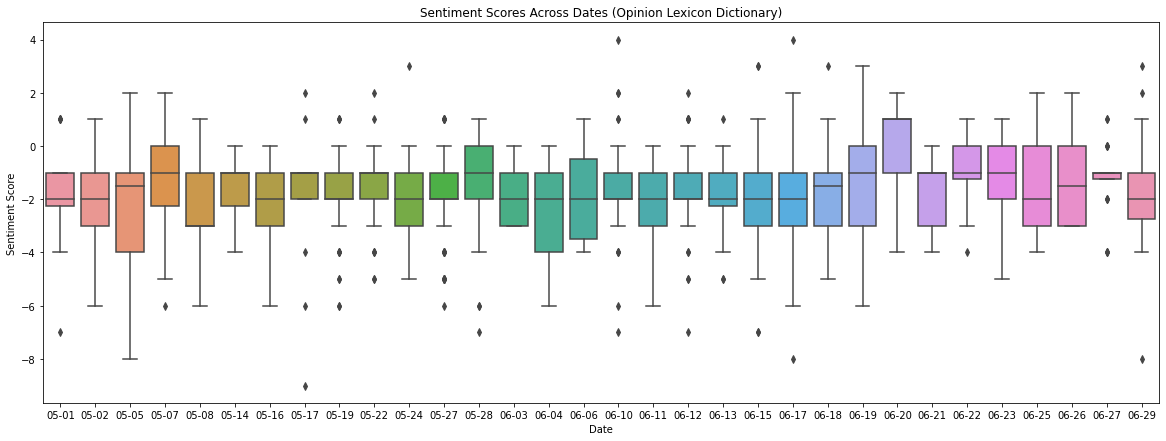

In [ ]:
sent_boxplot(opLex_df, 'Opinion Lexicon Dictionary')

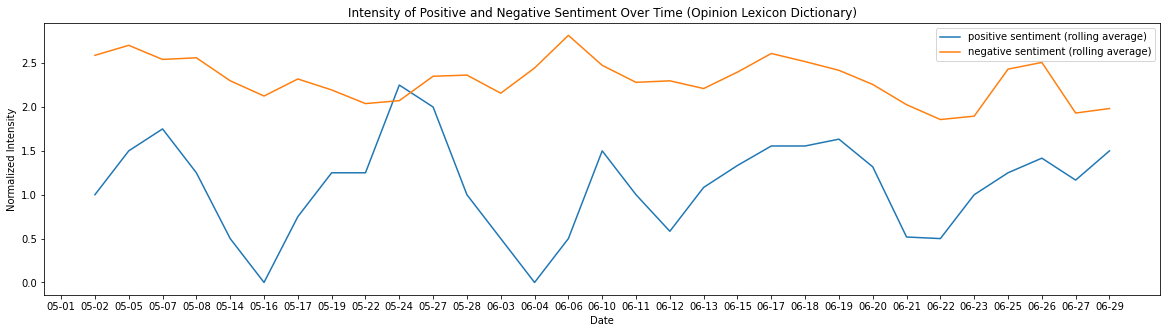

In [ ]:
sent_linegraph(opLex_df, 'Opinion Lexicon Dictionary')

We'll also calculate sentiment using VADER from NLTK - which returns the positivity, negativity, and neutrality of a text. We'll use the 'compound' score to analyze whether or not a tweet is negative/positive in nature overall.

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sentAnalyzer = SentimentIntensityAnalyzer()

sentiment_scores = []

for tweet in corpusFull:
  sentiment_scores.append(sentAnalyzer.polarity_scores(' '.join(tweet))['compound'])

print(sentiment_scores)

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[-0.128, 0.9001, -0.6705, -0.1531, 0.945, -0.6361, 0.2942, -0.6908, -0.9524, -0.9313, 0.6114, -0.6705, -0.6705, -0.6486, -0.6705, -0.7096, 0.9524, 0.4389, -0.1027, -0.9633, 0.6249, 0.0, -0.7579, -0.807, -0.8271, -0.872, -0.6808, -0.4019, 0.3818, 0.5719, -0.4939, 0.34, -0.6202, -0.8834, 0.8182, 0.6486, -0.6486, -0.6486, 0.7096, -0.8126, 0.34, 0.3612, 0.8176, -0.9325, -0.6705, -0.4215, -0.4215, -0.765, -0.7906, -0.8268, 0.0258, -0.8225, -0.1531, -0.802, -0.5267, 0.2263, 0.7184, -0.0276, 0.2714, 0.743, -0.6124, -0.6705, -0.9702, -0.6705, -0.9761, -0.2003, 0.7321, -0.34, 0.6486, -0.6705, -0.7506, -0.6808, -0.9042, -0.5413, -0.4939, -0.4939, -0.9442, -0.7506, 0.2003, -0.6249, -0.7184, -0.0258, -0.34, 0.2732, 0.6249, -0.25, -0.9081, -0.7506, -0.4215, 0.7971, -0.4588, -0.1531, 0.5106, -0.6964, -0.4215, -0.8316, 0.8402, -0.9382, -0.6705, -0.7906, -0.4019, -0.4019, 0.6124, -0.6369, -0.5719, 0.7321, 0.1027, 0.7964, -0.4215, 0.91

In [ ]:
vader_df = sent_df(sentiment_scores)

most_pos = vader_df[vader_df['sentiment'] == max(vader_df['sentiment'])]['id']
most_neg = vader_df[vader_df['sentiment'] == min(vader_df['sentiment'])]['id']

most_pos = int(most_pos.index[0])
most_neg = int(most_neg.index[0])

# printing most extreme tweets (positive and negative) as found by Afinn
print("MOST POSITIVE TWEET (VADER):")
print(corpus['tweet'].iloc[most_pos])

print("\nMOST NEGATIVE TWEET (VADER):")
print(corpus['tweet'].iloc[most_neg])

MOST POSITIVE TWEET (VADER):
@BibleLink Welcome to Jakarta dear friend and hope you to enjoy this wonderful special capital region of Indonesia in the loneliness environment caused by COVID-19. I'm apologize to make your trip is not for leisure but to be busy and over loaded caused you see me in my home country wirking

MOST NEGATIVE TWEET (VADER):
#Covid_19 may lead to increased suicidal behaviour due to development/exacerbation of RF’s such as mental ill-health, isolation, entrapment, grieving, loneliness, hopelessness, unresolved anger, stigma, unemployment, financial strain, domestic violence.  https://t.co/ANENzg89G0  https://t.co/EJ7YLonz3t


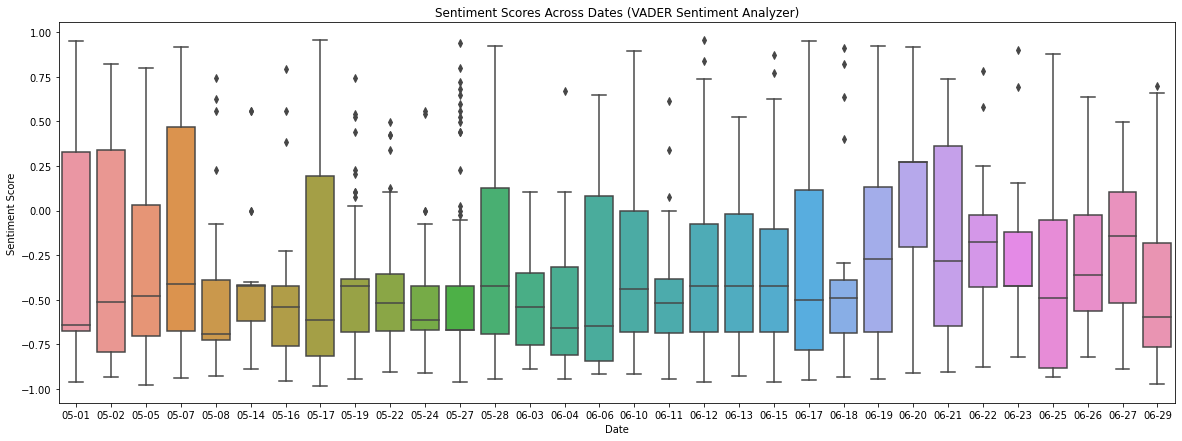

In [ ]:
sent_boxplot(vader_df, 'VADER Sentiment Analyzer')

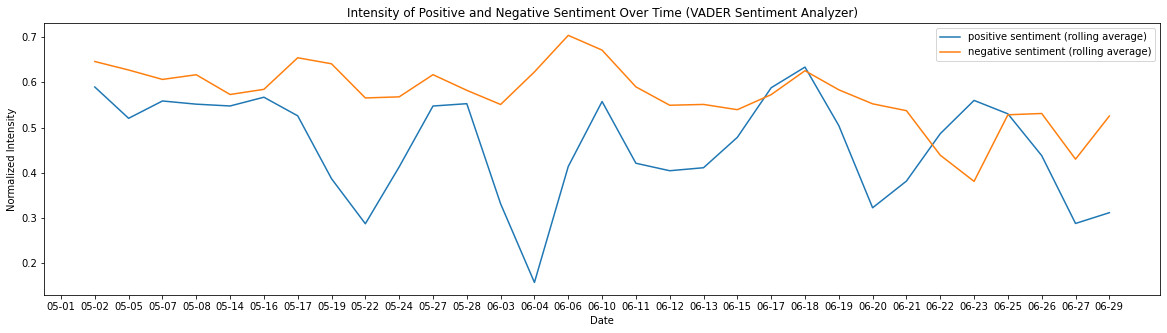

In [ ]:
sent_linegraph(vader_df, 'VADER Sentiment Analyzer')

Lastly, after testing these three dictionaries, we can compare the average negative and positive sentiment (across dictionaries) over time.

In [ ]:
import numpy as np

avgSent_df = pd.DataFrame({'date':afinn_df['date'],
                           'id':afinn_df['id'],
                           'afinn':afinn_df['sentiment'],
                           'opLex':opLex_df['sentiment'],
                           'vader':vader_df['sentiment']})
# averaging sentiment
avgSent_df['sentiment'] = avgSent_df[['afinn', 'opLex', 'vader']].mean(axis=1)

In [ ]:
# finding overall most positive/negative tweets

most_pos = avgSent_df[avgSent_df['sentiment'] == max(avgSent_df['sentiment'])]['id']
most_neg = avgSent_df[avgSent_df['sentiment'] == min(avgSent_df['sentiment'])]['id']

most_pos = int(most_pos.index[0])
most_neg = int(most_neg.index[0])

# printing most extreme tweets (positive and negative) as found by Afinn
print("MOST POSITIVE TWEET (VADER):")
print(corpus['tweet'].iloc[most_pos])

print("\nMOST NEGATIVE TWEET (VADER):")
print(corpus['tweet'].iloc[most_neg])

MOST POSITIVE TWEET (VADER):
‼️ Great news that @TNLComFund have awarded @GVATweets over £99k to help them continue their hard work helping our community combat Covid-19 &amp; loneliness this #LonelinessAwarenessWeek.    👏 Thanks to all the brilliant volunteers &amp; staff for their hard work.

MOST NEGATIVE TWEET (VADER):
This COVID-19 shit sucks. The symptoms are bad but worst of all the depression and loneliness it hits you with is way worse...


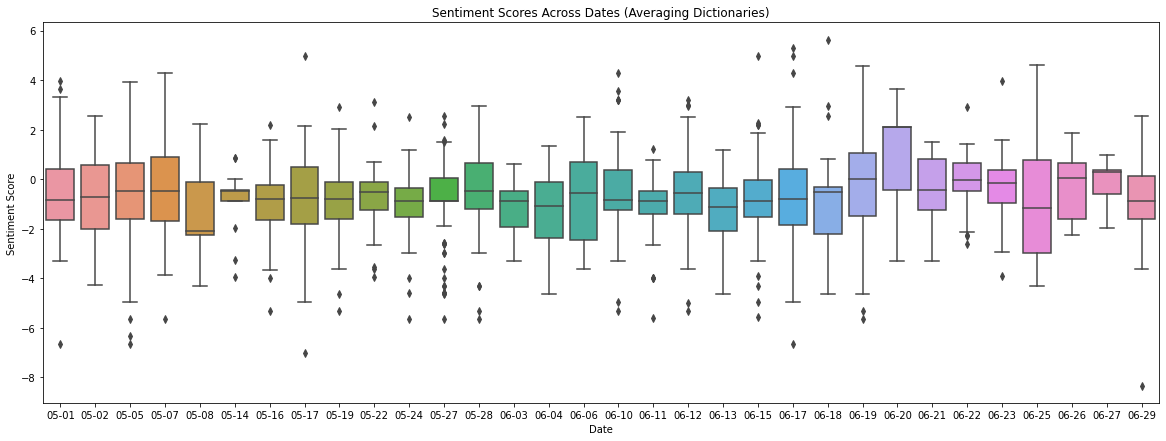

In [ ]:
sent_boxplot(avgSent_df[['sentiment', 'date']], 'Averaging Dictionaries')

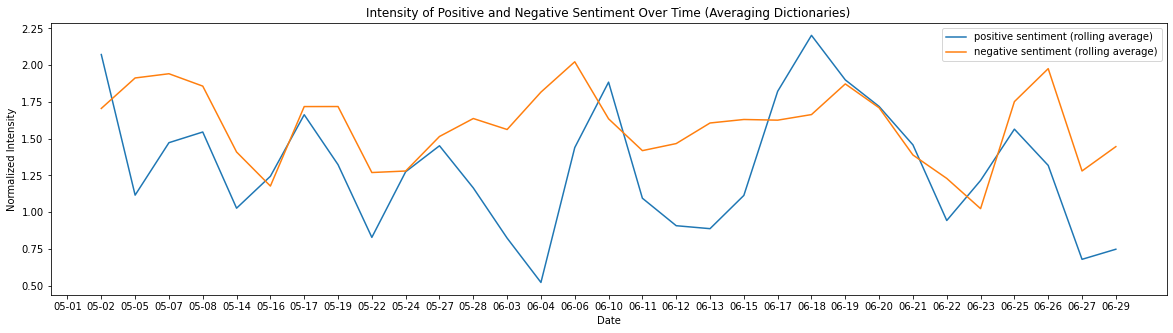

In [ ]:
sent_linegraph(avgSent_df[['sentiment', 'date']], 'Averaging Dictionaries')